<a href="https://colab.research.google.com/github/0707071/-Mobile-Phone-Data-Cleaning-EDA-Project/blob/main/Impute_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📊 Data Imputation - Mobile Phone Dataset

**Author:** Muhammad Ali Mumtaz

## 📌 Notebook Overview

This notebook focuses on handling missing or incomplete values in the cleaned mobile phone dataset.

### 🔧 Tasks Performed:

- Filling missing values for categorical columns using **mode**.
- Filling missing values for numerical columns using **zero** or **default assumptions** (e.g., 60Hz refresh rate).
- Using **group-wise imputation** (brand-wise mean for ratings).
- Logical assumptions (e.g., if rear camera is present but `num_of_cameras` is missing → it's likely "Single").
- Replacing missing or unusable entries in card sizes with `0`.
- Dropping unnecessary columns (like `processor_name`) post-processing.
- Setting a meaningful index (`model_name`) for cleaner access and merging.

### 💡 Key Techniques:
- `fillna()` for default and mode-based filling  
- `groupby().transform()` for group-level imputations  
- `np.where()` for conditional logic  
- Handling unknown or missing entries in features like card size and processor

This step ensures the dataset is now complete and ready for further analysis or modeling.

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path = "/content/cleaned_smartphones_data.csv"

# load data

df = pd.read_csv(data_path)

df.drop(index=[734], inplace=True)

df.head()

,price,rating,brand,model_name,number_of_sim,has_5G,has_NFC,has_IR_Blaster,cpu_speed,number_of_cores,...,fast_charging,fast_charging_power,display_size,resolution,refresh_rate,rear_camera,front_camera,num_of_cameras,card_size,has_card
0,54999.0,89.0,Oneplus,11 5G,2,True,True,False,3.2,8,...,True,100.0,6.70,1440 x 3216,120.0,50.0,16.0,Triple,NaN,False
1,19989.0,81.0,Oneplus,Nord CE 2 Lite 5G,2,True,False,False,2.2,8,...,True,33.0,6.59,1080 x 2412,120.0,64.0,16.0,Triple,1024.0,True
2,16499.0,75.0,Samsung,Galaxy A14 5G,2,True,False,False,2.4,8,...,True,15.0,6.60,1080 x 2408,90.0,50.0,13.0,Triple,1024.0,True
3,14999.0,81.0,Motorola,Moto G62 5G,2,True,False,False,2.2,8,...,True,NaN,6.55,1080 x 2400,120.0,50.0,16.0,Triple,1024.0,True
4,24999.0,82.0,Realme,10 Pro Plus,2,True,False,False,2.6,8,...,True,67.0,6.70,1080 x 2412,120.0,108.0,16.0,Triple,NaN,False


In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
# shape of data

df.shape

(965, 24)

In [ ]:
# fast charging

df['fast_charging'] = df['fast_charging'].astype(np.float64)

In [ ]:
df['fast_charging'].dtype

dtype('float64')

In [ ]:
# duplicates in data

df.duplicated().sum().item()

0

In [ ]:
df.sample(20)

,price,rating,brand,model_name,number_of_sim,has_5G,has_NFC,has_IR_Blaster,cpu_speed,number_of_cores,processor_name,memory,storage,capacity,fast_charging,fast_charging_power,display_size,resolution,refresh_rate,rear_camera,front_camera,num_of_cameras,card_size,has_card
363,23999.0,84.0,Huawei,Nova 10 SE,2,False,True,False,2.40,8,Sanpdragon,8.0,256.0,4500.0,1.0,66.0,6.67,1080 x 2160,90.0,108.0,16.0,Triple,NaN,False
776,58990.0,88.0,Oppo,Reno 10 Pro Plus,2,True,True,False,3.20,8,Snapdragon,12.0,256.0,4700.0,1.0,80.0,6.73,1080 x 2412,120.0,64.0,32.0,Quad,NaN,False
213,19999.0,78.0,Infinix,Hot 20,2,True,False,False,2.40,8,Dimensity,6.0,128.0,5000.0,1.0,18.0,6.60,1080 x 2408,120.0,50.0,8.0,Dual,1024.0,True
557,11990.0,68.0,Vivo,Y12G,2,False,False,False,2.00,8,Snapdragon,3.0,64.0,5000.0,0.0,NaN,6.51,720 x 1600,NaN,13.0,8.0,Triple,NaN,False
181,75999.0,82.0,Apple,iPhone 14,2,True,True,False,3.22,6,Bionic,6.0,256.0,3279.0,1.0,NaN,6.10,1170 x 2532,NaN,12.0,12.0,Dual,NaN,False
836,41990.0,NaN,Motorola,Moto X30 Pro,2,True,True,False,3.20,8,Snapdragon,8.0,128.0,4450.0,1.0,125.0,6.67,1080 x 2400,144.0,200.0,60.0,Triple,NaN,False
692,10499.0,73.0,Samsung,Galaxy F12,2,False,False,False,2.00,8,Exynos,4.0,64.0,6000.0,1.0,15.0,6.50,720 x 1600,90.0,48.0,8.0,Quad,512.0,True
803,54300.0,89.0,Google,Pixel 6 Pro,2,True,True,False,2.80,8,Google,12.0,128.0,5003.0,1.0,30.0,6.71,1440 x 3120,120.0,50.0,1.0,Triple,NaN,False
155,139990.0,77.0,Apple,iPhone 14 Pro Max,2,True,True,False,NaN,6,NaN,6.0,256.0,4323.0,1.0,NaN,6.70,1290 x 2796,120.0,48.0,12.0,Triple,NaN,False
640,30990.0,78.0,Sony,Xperia 10 III Lite 5G,1,True,True,False,2.00,8,Snapdragon,6.0,64.0,4500.0,1.0,30.0,6.00,1080 x 2520,NaN,12.0,8.0,Triple,NaN,False


In [ ]:
# missing values

columns_having_nan = (
                        df.isna()
                        .sum()
                        .loc[(lambda ser: ser.gt(0))]
                        .index
                        .to_list()
                        )

In [ ]:
columns_having_nan

['rating',
 'cpu_speed',
 'processor_name',
 'memory',
 'storage',
 'capacity',
 'fast_charging',
 'fast_charging_power',
 'display_size',
 'resolution',
 'refresh_rate',
 'rear_camera',
 'front_camera',
 'num_of_cameras',
 'card_size']

## Missing Values in data

1. MCAR (Missing completely at random)
2. MAR (Missing at random)
3. MNAR (Missing not at random)

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

<Axes: >

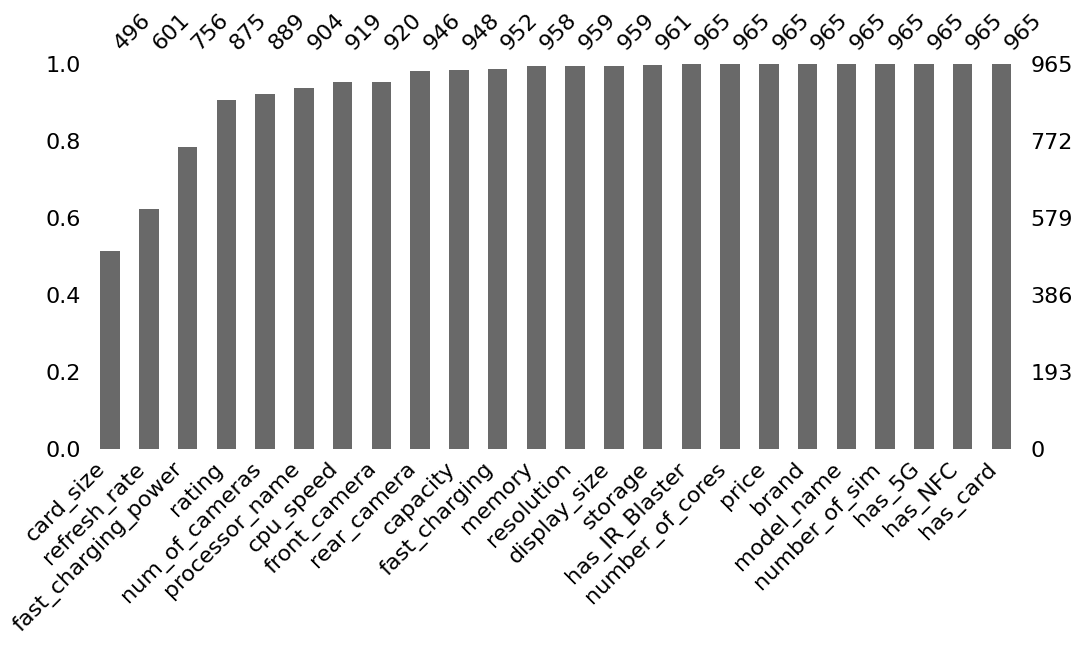

In [ ]:
# bar chart of missing values

msno.bar(df, figsize=(12,5), sort="ascending")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 965 entries, 0 to 965
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                965 non-null    float64
 1   rating               875 non-null    float64
 2   brand                965 non-null    object 
 3   model_name           965 non-null    object 
 4   number_of_sim        965 non-null    int64  
 5   has_5G               965 non-null    bool   
 6   has_NFC              965 non-null    bool   
 7   has_IR_Blaster       965 non-null    bool   
 8   cpu_speed            919 non-null    float64
 9   number_of_cores      965 non-null    int64  
 10  processor_name       904 non-null    object 
 11  memory               958 non-null    float64
 12  storage              961 non-null    float64
 13  capacity             948 non-null    float64
 14  fast_charging        952 non-null    float64
 15  fast_charging_power  756 non-null    float64


<Axes: >

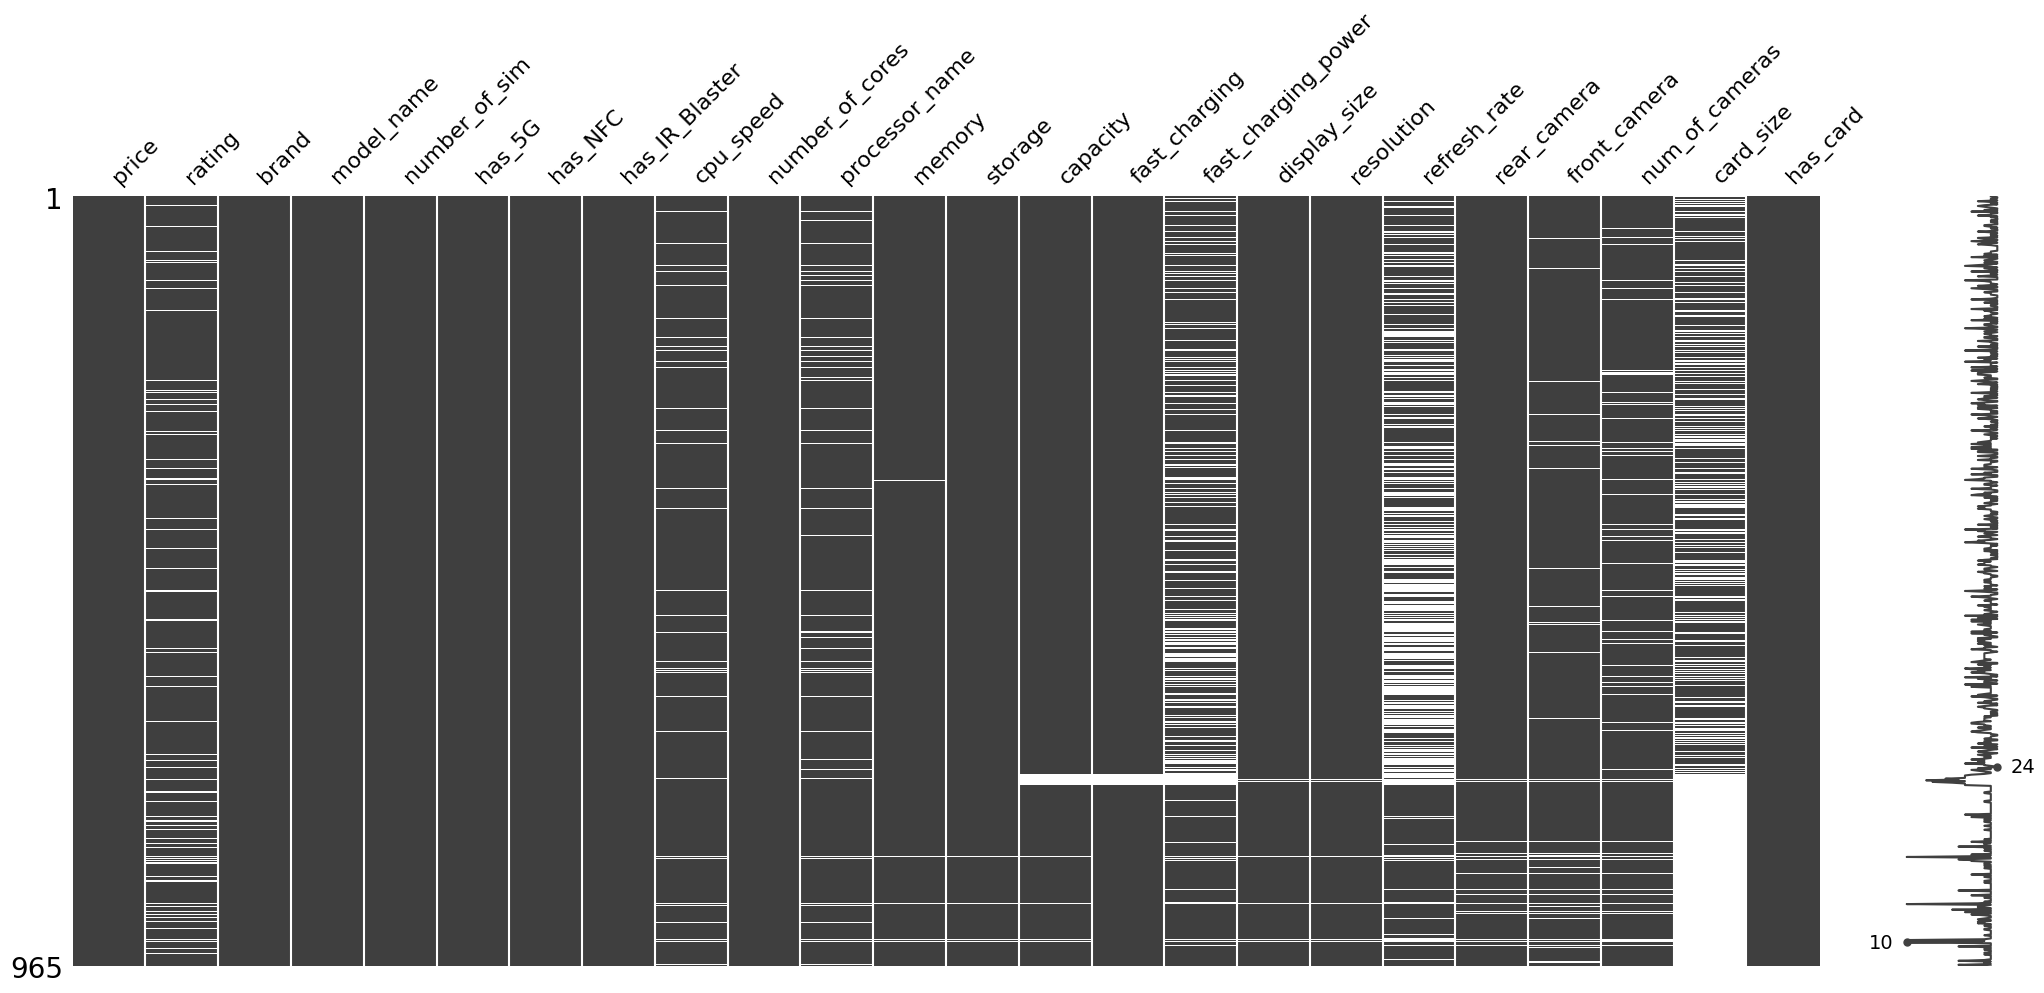

In [ ]:
# matrix

msno.matrix(df)

<Axes: >

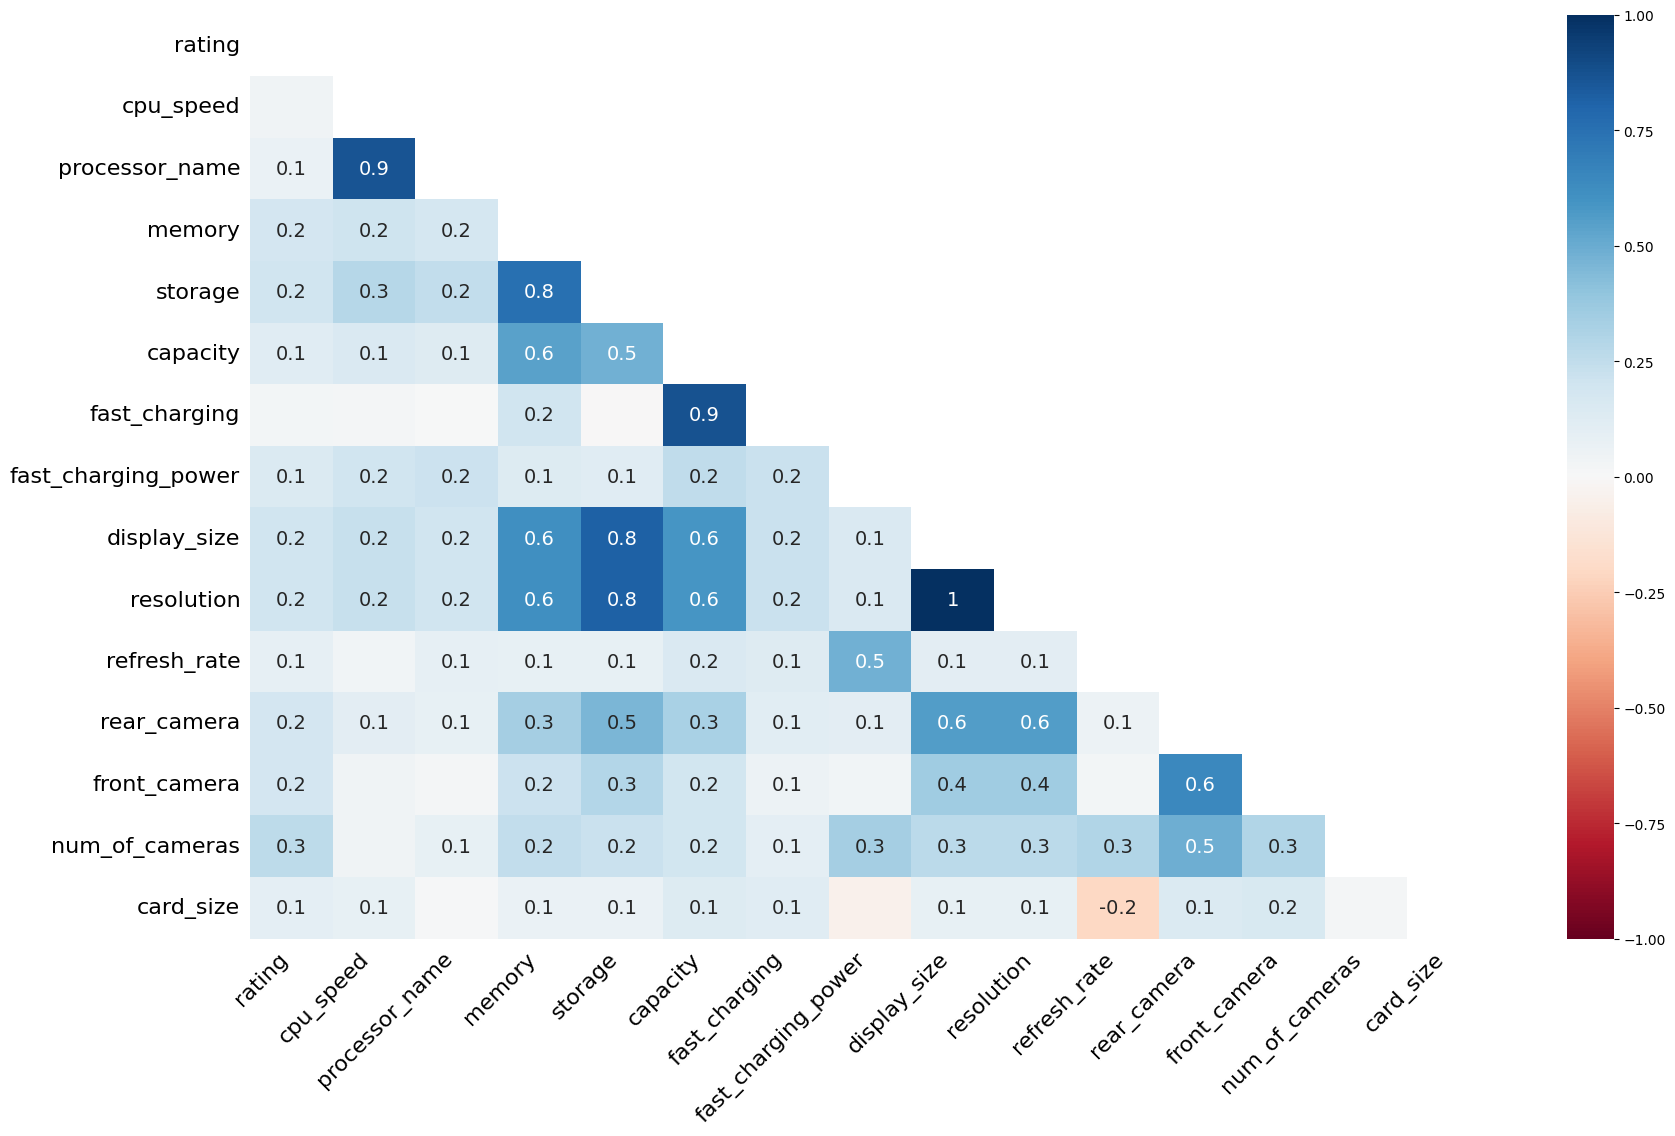

In [ ]:
# correlation

msno.heatmap(df)

In [ ]:
df.isna().astype(int)

,price,rating,brand,model_name,number_of_sim,has_5G,has_NFC,has_IR_Blaster,cpu_speed,number_of_cores,processor_name,memory,storage,capacity,fast_charging,fast_charging_power,display_size,resolution,refresh_rate,rear_camera,front_camera,num_of_cameras,card_size,has_card
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
963,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0
964,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
(
    df.isna()
    .sum()
    .loc[(lambda ser: ser.gt(0))]
    # .index
    # .to_list()
)

,0
rating,90
cpu_speed,46
processor_name,61
memory,7
storage,4
capacity,17
fast_charging,13
fast_charging_power,209
display_size,6
resolution,6


In [ ]:
# filter out nokia phones

df.loc[df["brand"].str.contains("nokia", case=False)].tail(3).index

Index([828, 887, 935], dtype='int64')

In [ ]:
# drop nokia flip phones

df.drop(index=[828, 887, 935], inplace=True)

In [ ]:
# unique brands in data

(
    df["brand"]
    .nunique()
)

43

In [ ]:
(
    df
    .loc[df["memory"].isna(),["brand","model_name","storage", "memory"]]
)

,brand,model_name,storage,memory
356,Huawei,Mate 50 RS Porsche Design,512.0,NaN
729,Apple,iPhone SE 3 2022,64.0,NaN
735,Apple,iPhone SE 4,64.0,NaN
932,Lg,Folder 2,NaN,NaN


In [ ]:
(
    df
    .loc[df["capacity"].isna(),["brand","model_name","capacity", "fast_charging"]]
)

,brand,model_name,capacity,fast_charging
725,Apple,iPhone 12,NaN,NaN
726,Apple,iPhone 12 Mini,NaN,NaN
727,Apple,iPhone 12,NaN,NaN
728,Apple,iPhone 12 Mini,NaN,NaN
729,Apple,iPhone SE 3 2022,NaN,NaN
730,Apple,iPhone 15 Pro,NaN,NaN
731,Apple,iPhone 7s,NaN,NaN
732,Apple,iPhone 12 Pro,NaN,NaN
733,Apple,iPhone SE 2020,NaN,NaN
735,Apple,iPhone SE 4,NaN,NaN


In [ ]:
(
    df.loc[
        df["num_of_cameras"].isna(), :
    ]
)

,price,rating,brand,model_name,number_of_sim,has_5G,has_NFC,has_IR_Blaster,cpu_speed,number_of_cores,processor_name,memory,storage,capacity,fast_charging,fast_charging_power,display_size,resolution,refresh_rate,rear_camera,front_camera,num_of_cameras,card_size,has_card
40,11990.0,64.0,Jio,JioPhone 5G,2,True,False,False,2.20,8,Snapdragon,4.0,32.0,5000.0,1.0,18.0,6.50,720 x 1600,90.0,13.0,8.0,NaN,512.0,True
52,9499.0,62.0,Oppo,A17K,2,False,False,False,2.30,8,Helio,3.0,64.0,5000.0,0.0,NaN,6.56,720 x 1612,NaN,8.0,5.0,NaN,1024.0,True
60,8388.0,66.0,Xiaomi,Redmi 10A,2,False,False,False,2.00,8,Helio,4.0,64.0,5000.0,0.0,NaN,6.53,720 x 1600,NaN,13.0,5.0,NaN,512.0,True
105,4499.0,NaN,Jio,Phone 3,2,False,False,False,1.40,4,NaN,2.0,64.0,2800.0,0.0,NaN,5.00,720 x 1280,NaN,5.0,2.0,NaN,128.0,True
115,5299.0,NaN,Realme,C30,2,False,False,False,1.82,8,Tiger,2.0,32.0,5000.0,0.0,NaN,6.50,720 x 1600,NaN,8.0,5.0,NaN,1024.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,11999.0,NaN,Lg,Folder 2,1,False,False,False,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
934,15999.0,67.0,Google,Pixel 3a XL,1,False,True,False,2.00,8,Qualcomm,4.0,64.0,3700.0,1.0,18.0,6.00,1080 x 2160,NaN,2.0,8.0,NaN,NaN,False
940,149999.0,87.0,Royole,FlexPai 3 5G,2,True,False,False,2.84,8,Snapdragon,8.0,128.0,3360.0,0.0,NaN,7.20,1440 x 1920,NaN,NaN,NaN,NaN,NaN,False
958,169000.0,NaN,Huawei,Mate X,2,True,True,True,2.86,8,Kirin,8.0,512.0,4500.0,1.0,55.0,8.00,2200 x 2480,NaN,NaN,NaN,NaN,NaN,False


## Impute Values

In [ ]:
(
    df.isna()
    .sum()
    .loc[(lambda ser: ser.gt(0))]
)

,0
rating,87
cpu_speed,43
processor_name,58
memory,4
storage,1
capacity,14
fast_charging,13
fast_charging_power,206
display_size,3
resolution,3


### rating

In [ ]:
# unique brands

unique_brands = (
                df
                .loc[:, "brand"]
                .unique()
            )

In [ ]:
# brands with rating missing

brands_with_missing_ratings = (
                                df
                                .loc[df["rating"].isna(), "brand"]
                                .unique()
                            )

In [ ]:
brands_to_fill = np.intersect1d(unique_brands, brands_with_missing_ratings)

In [ ]:
brands_to_fill

array(['Apple', 'Asus', 'Gionee', 'Google', 'Honor', 'Huawei', 'Infinix',
       'Itel', 'Jio', 'Lava', 'Letv', 'Lg', 'Motorola', 'Nokia',
       'Oneplus', 'Oppo', 'Poco', 'Realme', 'Samsung', 'Sony', 'Tecno',
       'Vivo', 'Xiaomi'], dtype=object)

In [ ]:
df["rating"].describe()

,rating
count,875.000000
mean,78.275429
std,7.362362
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


In [ ]:
df["rating"].skew()

np.float64(-0.698068752076897)

<Axes: xlabel='rating', ylabel='Density'>

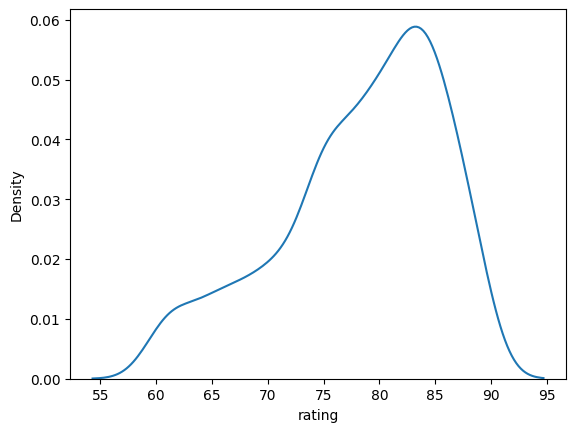

In [ ]:
sns.kdeplot(df, x="rating")

In [ ]:
# avg values for ratings

avg_ratings = (
                df
                .groupby("brand")["rating"]
                .mean()
                .to_dict()
            )

In [ ]:
avg_ratings

{'Apple': 76.79545454545455,
 'Asus': 87.0,
 'Blackview': 67.0,
 'Blu': 85.0,
 'Cola': 74.0,
 'Doogee': 86.0,
 'Gionee': 67.0,
 'Google': 77.33333333333333,
 'Honor': 78.18181818181819,
 'Huawei': 80.0,
 'Ikall': 60.666666666666664,
 'Infinix': 76.28571428571429,
 'Iqoo': 82.21875,
 'Itel': 61.0,
 'Jio': 64.0,
 'Lava': 74.33333333333333,
 'Leeco': 65.0,
 'Leitz': 89.0,
 'Lenovo': 88.0,
 'Letv': 60.0,
 'Lg': 87.0,
 'Micromax': 64.66666666666667,
 'Motorola': 80.10416666666667,
 'Nokia': 75.3,
 'Nothing': 85.2,
 'Nubia': 84.33333333333333,
 'Oneplus': 82.23684210526316,
 'Oppo': 78.64197530864197,
 'Oukitel': 79.33333333333333,
 'Poco': 78.7,
 'Realme': 76.5934065934066,
 'Redmi': 77.33333333333333,
 'Royole': 87.0,
 'Samsung': 78.63478260869566,
 'Sharp': 88.0,
 'Sony': 81.42857142857143,
 'Tcl': 60.0,
 'Tecno': 73.6774193548387,
 'Tesla': 83.0,
 'Vertu': 62.0,
 'Vivo': 77.15625,
 'Xiaomi': 78.776,
 'Zte': 85.5}

In [ ]:
# (
#     df
#     .set_index("brand")
#     .loc[:,"rating"]
#     .fillna(avg_ratings)
# ).isna().sum()

In [ ]:
(
    df[["brand","rating","model_name"]]
    .head(5)
)

,brand,rating,model_name
0,Oneplus,89.0,11 5G
1,Oneplus,81.0,Nord CE 2 Lite 5G
2,Samsung,75.0,Galaxy A14 5G
3,Motorola,81.0,Moto G62 5G
4,Realme,82.0,10 Pro Plus


In [ ]:
df["rating"]

,rating
0,89.0
1,81.0
2,75.0
3,81.0
4,82.0
...,...
961,86.0
962,89.0
963,NaN
964,80.0


In [ ]:
avg_ratings["Samsung"]

78.63478260869566

In [ ]:
# Fill missing ratings with the mean rating of the respective brand

(
    df
    .groupby("brand")["rating"]
    .transform("mean")
    .pipe(lambda ser: df["rating"].fillna(ser))
    .rename("rating_filled")
    .pipe(lambda ser: pd.concat([df["rating"], ser], axis=1))
).isna().sum()

,0
rating,87
rating_filled,0


### memory, storage

In [ ]:
# mode of both columns

(
    df[["memory","storage"]]
    .mode()
)

,memory,storage
0,8.0,128.0


### fast charging and power

In [ ]:
df[["fast_charging", "fast_charging_power"]].dtypes

,0
fast_charging,float64
fast_charging_power,float64


In [ ]:
df.loc[:,["fast_charging_power", "fast_charging"]]

,fast_charging_power,fast_charging
0,100.0,1.0
1,33.0,1.0
2,15.0,1.0
3,NaN,1.0
4,67.0,1.0
...,...,...
961,80.0,1.0
962,120.0,1.0
963,NaN,0.0
964,67.0,1.0


In [ ]:
df.loc[:,["fast_charging_power", "fast_charging"]].isna().sum()

,0
fast_charging_power,206
fast_charging,13


### refresh rate

In [ ]:
def impute_refresh_rate(ser: pd.Series) -> pd.Series:
    """
    Fills missing refresh rate values with a default of 60 Hz.

    Assumption:
    - Mobile phones with missing refresh rate data are assumed to have at least 60 Hz,
      as 60 Hz is a common baseline refresh rate for most devices.

    Parameters
    ----------
    ser : pd.Series
        A series containing refresh rate values, possibly with missing (NaN) entries.

    Returns
    -------
    pd.Series
        The series with missing values replaced by 60.
    """
    return ser.fillna(60)


In [ ]:
df.columns

Index(['price', 'rating', 'brand', 'model_name', 'number_of_sim', 'has_5G',
       'has_NFC', 'has_IR_Blaster', 'cpu_speed', 'number_of_cores',
       'processor_name', 'memory', 'storage', 'capacity', 'fast_charging',
       'fast_charging_power', 'display_size', 'resolution', 'refresh_rate',
       'rear_camera', 'front_camera', 'num_of_cameras', 'card_size',
       'has_card'],
      dtype='object')

### number of cameras

In [ ]:
(
    pd.Series(
        np.where(df["rear_camera"].notnull(), 1, 0),
        index=df.index
        )
)

,0
0,1
1,1
2,1
3,1
4,1
...,...
961,1
962,1
963,1
964,1


In [ ]:
(
    df["num_of_cameras"]
)

,num_of_cameras
0,Triple
1,Triple
2,Triple
3,Triple
4,Triple
...,...
961,Triple
962,Triple
963,NaN
964,Triple


In [ ]:
(
    df["num_of_cameras"]
    .fillna(pd.Series(
        np.where(df["rear_camera"].notnull(), "Single" , "Zero"),
        index=df.index
        )))


,num_of_cameras
0,Triple
1,Triple
2,Triple
3,Triple
4,Triple
...,...
961,Triple
962,Triple
963,Single
964,Triple


### card size

In [ ]:
(
    df["card_size"]
    .mode()
)

,card_size
0,1024.0


In [ ]:
(
    df["card_size"]
    .value_counts()
)

,count
card_size,
1024.0,262
512.0,116
256.0,100
128.0,7
2.0,6
32.0,3
1000.0,1
64.0,1


In [ ]:
def impute_card_size(ser: pd.Series) -> pd.Series:
    """
    Fills missing memory card size values with 0.

    Assumption:
    - Missing values indicate the device does not support a memory card slot.

    Parameters
    ----------
    ser : pd.Series
        A series with memory card size values, possibly containing missing entries.

    Returns
    -------
    pd.Series
        The series with missing values replaced by 0.
    """
    return ser.fillna(0)


In [ ]:
(
    df.loc[(df["has_card"] == True) & (df["card_size"].isna()),
            ["card_size", "has_card"]]
    .value_counts()
)


,,count
card_size,has_card,


## Impute Values in Data

In [ ]:
(
    df.isna().sum()
)

,0
price,0
rating,87
brand,0
model_name,0
number_of_sim,0
has_5G,0
has_NFC,0
has_IR_Blaster,0
cpu_speed,43
number_of_cores,0


In [ ]:
# columns to fill with mode

columns_to_fill_with_mode = ["capacity","memory", "storage"]

# fill with zero
columns_to_fill_with_zero = ["fast_charging", "fast_charging_power", "rear_camera", "card_size"]

In [ ]:
def impute_missing_values(df: pd.DataFrame):

    """
    Imputes missing values in the DataFrame using different strategies for each column type.

    What it does:
    - Fills specified categorical columns with their mode (most frequent value).
    - Fills specified numeric columns with zero.
    - For the 'rating' column, fills missing values with the mean rating per brand.
    - Fills missing 'refresh_rate' values with 60 Hz.
    - Fills missing 'num_of_cameras' based on the presence of rear camera:
        - "Single" if rear camera info exists
        - "Zero" if no rear camera info
    - Drops the 'processor_name' column.
    - Sets 'model_name' as the DataFrame index.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame with phone data and missing values.

    Returns
    -------
    pd.DataFrame
        The DataFrame with missing values filled and cleaned, ready for analysis.


    """

    return(
        df
        .assign(
            **{
                col: df[col].fillna(df[col].mode()[0])
                for col in columns_to_fill_with_mode
            },
            **{
                col: df[col].fillna(0)
                for col in columns_to_fill_with_zero
            },
            rating = (
                df
                .groupby("brand")["rating"]
                .transform("mean")
                .pipe(lambda ser: df["rating"].fillna(ser))),
            refresh_rate = df["refresh_rate"].fillna(60),
            num_of_cameras = (
                                df["num_of_cameras"]
                                .fillna(pd.Series(
                                np.where(df["rear_camera"].notnull(), "Single" , "Zero"),
                                index=df.index)
                                )
                            )
        )
        .drop(columns=["processor_name"])
        .set_index("model_name")
        )


In [ ]:
final_df = impute_missing_values(df)

In [ ]:
final_df

,price,rating,brand,number_of_sim,has_5G,has_NFC,has_IR_Blaster,cpu_speed,number_of_cores,memory,storage,capacity,fast_charging,fast_charging_power,display_size,resolution,refresh_rate,rear_camera,front_camera,num_of_cameras,card_size,has_card
model_name,,,,,,,,,,,,,,,,,,,,,,
11 5G,54999.0,89.0,Oneplus,2,True,True,False,3.2,8,12.0,256.0,5000.0,1.0,100.0,6.70,1440 x 3216,120.0,50.0,16.0,Triple,0.0,False
Nord CE 2 Lite 5G,19989.0,81.0,Oneplus,2,True,False,False,2.2,8,6.0,128.0,5000.0,1.0,33.0,6.59,1080 x 2412,120.0,64.0,16.0,Triple,1024.0,True
Galaxy A14 5G,16499.0,75.0,Samsung,2,True,False,False,2.4,8,4.0,64.0,5000.0,1.0,15.0,6.60,1080 x 2408,90.0,50.0,13.0,Triple,1024.0,True
Moto G62 5G,14999.0,81.0,Motorola,2,True,False,False,2.2,8,6.0,128.0,5000.0,1.0,0.0,6.55,1080 x 2400,120.0,50.0,16.0,Triple,1024.0,True
10 Pro Plus,24999.0,82.0,Realme,2,True,False,False,2.6,8,6.0,128.0,5000.0,1.0,67.0,6.70,1080 x 2412,120.0,108.0,16.0,Triple,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Civi 3,32990.0,86.0,Xiaomi,2,True,True,True,3.1,8,8.0,256.0,5000.0,1.0,80.0,6.70,1080 x 2400,120.0,64.0,NaN,Triple,0.0,False
Find X6,69990.0,89.0,Oppo,2,True,True,False,3.2,8,8.0,256.0,4700.0,1.0,120.0,6.73,1080 x 2400,120.0,50.0,32.0,Triple,0.0,False
A23s,4787.0,61.0,Itel,2,False,False,False,1.4,4,2.0,32.0,3020.0,0.0,0.0,5.00,854 x 480,60.0,2.0,NaN,Single,0.0,False


In [ ]:
final_df.isna().sum().loc[lambda ser: ser.gt(0)]

,0
cpu_speed,43
display_size,3
resolution,3
front_camera,42


In [ ]:
final_df[["rating"]].join(df.set_index("model_name")["rating"].rename("original_rating")).sample(30)

,rating,original_rating
model_name,,
Note 12 Turbo,79.000000,79.0
Nord N20 5G,81.000000,81.0
Galaxy A33 5G,85.000000,82.0
Nord SE,73.000000,73.0
Galaxy A50s,80.000000,80.0
C35,71.000000,71.0
Nova Y61,63.000000,63.0
Redmi Note 12 Pro Plus,86.000000,84.0
Galaxy S22 Ultra 5G,78.634783,NaN


In [ ]:
df.set_index("model_name").loc[["A23s", "A24 Pro"]]

,price,rating,brand,number_of_sim,has_5G,has_NFC,has_IR_Blaster,cpu_speed,number_of_cores,processor_name,memory,storage,capacity,fast_charging,fast_charging_power,display_size,resolution,refresh_rate,rear_camera,front_camera,num_of_cameras,card_size,has_card
model_name,,,,,,,,,,,,,,,,,,,,,,,
A23s,4787.0,NaN,Itel,2,False,False,False,1.4,4,Spreadtrum,2.0,32.0,3020.0,0.0,NaN,5.0,854 x 480,NaN,2.0,NaN,NaN,NaN,False
A24 Pro,5990.0,NaN,Itel,2,False,False,False,1.4,4,Unisoc,2.0,32.0,3020.0,0.0,NaN,5.0,854 x 480,NaN,2.0,3.0,NaN,NaN,False


In [ ]:
final_df.loc[["A23s", "A24 Pro"]]

,price,rating,brand,number_of_sim,has_5G,has_NFC,has_IR_Blaster,cpu_speed,number_of_cores,memory,storage,capacity,fast_charging,fast_charging_power,display_size,resolution,refresh_rate,rear_camera,front_camera,num_of_cameras,card_size,has_card
model_name,,,,,,,,,,,,,,,,,,,,,,
A23s,4787.0,61.0,Itel,2,False,False,False,1.4,4,2.0,32.0,3020.0,0.0,0.0,5.0,854 x 480,60.0,2.0,NaN,Single,0.0,False
A24 Pro,5990.0,61.0,Itel,2,False,False,False,1.4,4,2.0,32.0,3020.0,0.0,0.0,5.0,854 x 480,60.0,2.0,3.0,Single,0.0,False


In [ ]:
(
    df[["brand", "rating"]]
    .groupby("brand")["rating"]
    .mean()
    .loc["Itel"]
)

np.float64(61.0)

In [ ]:
# save the final data

final_df.to_csv("smartphones_data.csv")